Runge's phenomenon

1. Consider $f(x)=\frac{1}{1+x^2}~$ where $~-5\leq x \leq 5$
, we take 100 points.

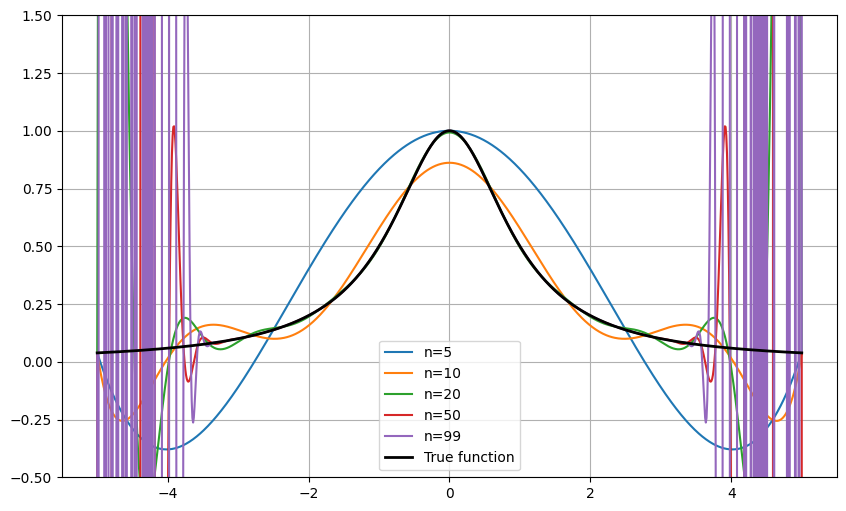

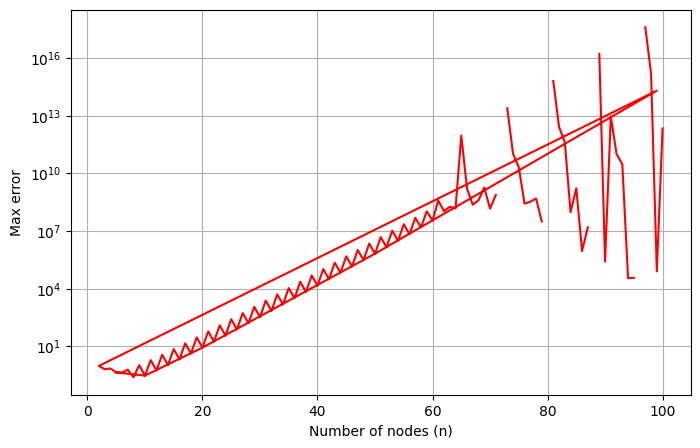

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator

# function
f = lambda x: 1/(1 + x**2)

x_plot = np.linspace(-5, 5, 1000)
y_true = f(x_plot)

# Test n=2 to n=100
errors = []

plt.figure(figsize=(10, 6))

for n in [5, 10, 20, 50, 99]:  # 只看其中幾個n
    x_nodes = np.linspace(-5, 5, n)
    y_nodes = f(x_nodes)

    interp = BarycentricInterpolator(x_nodes, y_nodes)
    y_interp = interp(x_plot)

    plt.plot(x_plot, y_interp, label=f'n={n}')

    # maximum error
    errors.append((n, np.max(np.abs(y_interp - y_true))))

plt.plot(x_plot, y_true, 'k', linewidth=2, label='True function')
plt.ylim([-0.5, 1.5])
plt.legend()
plt.grid(True)
plt.show()

# error curve
for n in range(2, 101):
    x_nodes = np.linspace(-5, 5, n)
    y_nodes = f(x_nodes)
    interp = BarycentricInterpolator(x_nodes, y_nodes)
    y_interp = interp(x_plot)
    errors.append((n, np.max(np.abs(y_interp - y_true))))

# plot
n_values, err_values = zip(*errors)
plt.figure(figsize=(8,5))
plt.semilogy(n_values, err_values, 'r-')
plt.xlabel("Number of nodes (n)")
plt.ylabel("Max error")
plt.grid(True)
plt.show()


2. Consider $f(x)=\text{sin}(x)~$ where $~ x\in [0,1]$ interpolate polynomial way 10 points with a different algorithm. scipy interpolate

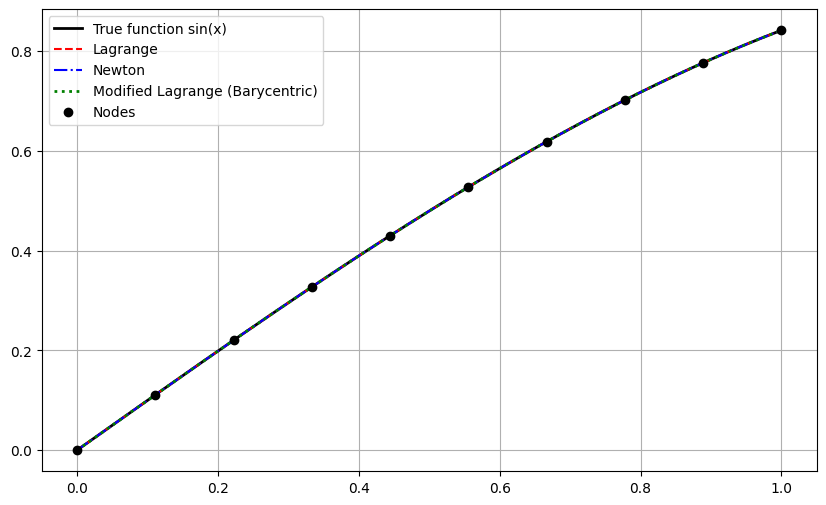

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator

# function
f = np.sin
x_true = np.linspace(0, 1, 500)
y_true = f(x_true)

# 10 points
x_nodes = np.linspace(0, 1, 10)
y_nodes = f(x_nodes)


# 1. Lagrange interpolation
def lagrange_interpolation(x_nodes, y_nodes, x_eval):
    n = len(x_nodes)
    P = np.zeros_like(x_eval)
    for i in range(n):
        # 建立 Lagrange 基底
        li = np.ones_like(x_eval)
        for j in range(n):
            if i != j:
                li *= (x_eval - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        P += y_nodes[i] * li
    return P

y_lagrange = lagrange_interpolation(x_nodes, y_nodes, x_true)

# 2. Newton interpolation
def divided_differences(x_nodes, y_nodes):
    n = len(x_nodes)
    coef = np.copy(y_nodes).astype(float)
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j-1:n-1]) / (x_nodes[j:n] - x_nodes[0:n-j])
    return coef

def newton_interpolation(x_nodes, coef, x_eval):
    n = len(coef)
    P = coef[-1] * np.ones_like(x_eval)
    for k in range(n-2, -1, -1):
        P = P * (x_eval - x_nodes[k]) + coef[k]
    return P

coef_newton = divided_differences(x_nodes, y_nodes)
y_newton = newton_interpolation(x_nodes, coef_newton, x_true)


# 3. Modified Lagrange
interp_bary = BarycentricInterpolator(x_nodes, y_nodes)
y_bary = interp_bary(x_true)


# 畫圖比較
plt.figure(figsize=(10,6))
plt.plot(x_true, y_true, 'k', linewidth=2, label="True function sin(x)")
plt.plot(x_true, y_lagrange, 'r--', label="Lagrange")
plt.plot(x_true, y_newton, 'b-.', label="Newton")
plt.plot(x_true, y_bary, 'g:', linewidth=2, label="Modified Lagrange (Barycentric)")
plt.plot(x_nodes, y_nodes, 'ko', label="Nodes")
plt.legend()
plt.grid(True)
plt.show()
